# Consulta de la base de datos KEGG con Python/Biopython

## Pregunta

> ¿Cómo podemos acceder a las bases de datos de KEGG a través del módulo **Bio.KEGG** de Biopython y extraer información relevante sobre genes y vías metabólicas para su análisis bioinformático?

## Objetivos

### General
> Aprender a usar el módulo **Bio.KEGG** de Biopython para consultar información biológica en la base de datos KEGG y comprender los tipos de datos que se pueden obtener.

### Específicos
1. Conocer qué es **Bio.KEGG** y para qué se utiliza.
2. Realizar consultas básicas a KEGG para obtener información sobre genes, rutas metabólicas, compuestos, entre otros.
3. Interpretar de manera sencilla los resultados obtenidos de las consultas.
4. Extraer y organizar información útil para su análisis posterior o visualización.

## 1. ¿Qué es Bio.KEGG?

De manera general, [**Bio.KEGG**](https://biopython.org/docs/1.84/Tutorial/chapter_kegg.html) es un módulo de [**Biopython**](https://biopython.org/) que permite acceder y manipular datos de la base de datos [**KEGG**](https://www.genome.jp/kegg/) directamente desde Python.  

En términos simples:

**KEGG** es una base de datos que nos permite entender cómo funcionan las células, los organismos y los ecosistemas a partir de información molecular. Contiene datos sobre genes, rutas metabólicas, compuestos y organismos, entre otros.

**Bio.KEGG** actúa como un puente entre Python y KEGG, facilitando la consulta, descarga y análisis de estos datos.

Se basa en la REST API (una forma de “pedir y recibir datos” entre programas a través de Internet, usando URLs y peticiones HTTP) de KEGG, por lo que puedes hacer consultas programáticas y obtener resultados en formatos fáciles de manejar con Python.

Permite tanto consultas simples (por ejemplo, obtener la información de un gen) como operaciones más complejas (como analizar rutas metabólicas completas o relacionar genes con compuestos).
 
En la siguiente tabla se muestran las funciones para hacer consultas a **KEGG** por medio de **Bio.KEGG**:

| Función         | Descripción                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| `kegg_list()`   | Lista todas las bases de datos de KEGG.                                     |
| `kegg_info()`   | Obtiene información general sobre una base de datos de KEGG.                |
| `kegg_conv()`   | Convierte identificadores de KEGG a los de otras bases de datos.            |
| `kegg_find()`   | Busca entradas en KEGG que coincidan con un dato de consulta.               |
| `kegg_get()`    | Recupera información detallada de una entrada específica en KEGG.           |
| `kegg_link()`   | Encuentra entradas en KEGG usando referencias cruzadas de otras bases.      |

En términos sencillos, la forma general de usar estas funciones es siempre la misma: elegir la función, indicar lo que se va a buscar y guardar el resultado en una variable.

```python
myvar = REST.<función>(<consulta>, <arg1>, <arg2>, ...)
```

- `<función>`: el nombre de la función que quieres usar (por ejemplo, kegg_list, kegg_get).
- `<consulta>`: el dato que quieres buscar en KEGG (por ejemplo, el nombre de un organismo, un gen o una ruta).
- `<arg1>`, `<arg2>`, ...: algunos parámetros extra que ciertas funciones necesitan.

En las siguientes secciones veremos cómo usar cada una de estas funciones.

## 2. ```kegg_list```

De manera general, la función ```kegg_list``` devuelve una lista de identificadores de KEGG junto con su descripción asociada, ya sea de toda una base de datos o de un conjunto específico de elementos. Para consultar la descripción y parámetros de la función, podemos solicitar la yuda. 

In [19]:
# Importando la biblioteca REST
from Bio.KEGG import REST

# Solicitando la ayuda de kegg_list
help(REST.kegg_list)

Help on function kegg_list in module Bio.KEGG.REST:

kegg_list(database, org=None)
    KEGG list - Entry list for database, or specified database entries.
    
    db - database or organism (string)
    org - optional organism (string), see below.
    
    For the pathway and module databases the optional organism can be
    used to restrict the results.



### 2.1 ¿Qué bases de datos puedo consultar?

En particular, si a ```kegg_list``` se le proporciona el parámetro **"database"**, se obtiene la lista de todas las bases de datos disponibles en KEGG para su consulta. Como se muestra en el siguiente código.

In [20]:
# Importando la biblioteca de pandas para trabajar con tablas (dataframes) y
# y la biblioteca io, para trabajar con datos (archivos, cadenas, binarios) "como si fueran archivos"
import pandas as pd
import io

# Obtener lista de bases de datos de KEGG
resultado = REST.kegg_list("database").read()

df = pd.read_table(io.StringIO(resultado), header = None)
display(df)



,0,1
0,pathway,KEGG Pathway Database
1,module,KEGG Module Database
2,network,KEGG Network Database
3,variant,KEGG Variant Database
4,disease,KEGG Disease Database
5,brite,KEGG Brite Database
6,orthology,KEGG Orthology Database
7,genes,KEGG Genes Database
8,genome,KEGG Genome Database
9,mgenes,KEGG Metagenome Genes Database


### 2.2 Lista de todos los organismos registrados en Kegg

Para consultar la lista de organismos disponibles en KEGG, utilizamos el parámetro **"organism"**, en la función `kegg_list`. Por ejemplo:

In [21]:
# Consultando los organismos disponibles en Kegg
result = REST.kegg_list("organism").read()

# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None, sep="\t")
display(df)

,0,1,2,3
0,T01001,hsa,Homo sapiens (human),Eukaryotes;Animals;Mammals;Primates
1,T01005,ptr,Pan troglodytes (chimpanzee),Eukaryotes;Animals;Mammals;Primates
2,T02283,pps,Pan paniscus (bonobo),Eukaryotes;Animals;Mammals;Primates
3,T02442,ggo,Gorilla gorilla gorilla (western lowland gorilla),Eukaryotes;Animals;Mammals;Primates
4,T01416,pon,Pongo abelii (Sumatran orangutan),Eukaryotes;Animals;Mammals;Primates
...,...,...,...,...
11320,T09593,lob,Candidatus Lokiarchaeum ossiferum,Prokaryotes;Archaea;Promethearchaeota;Lokiarch...
11321,T06555,psyt,Promethearchaeum syntrophicum,Prokaryotes;Archaea;Promethearchaeota;Promethe...
11322,T09928,oyw,Candidatus Odinarchaeum yellowstonii,Prokaryotes;Archaea;Odinarchaeota;Odinarchaeum
11323,T03835,agw,Archaeon GW2011_AR10,Prokaryotes;Archaea;unclassified Archaea


Una vez que se obtiene la tabla, se puede filtrar la información para un organismo en particular. Por ejemplo, podemos buscar los datos relacionados con ***Drosophila melanogaster***.

In [22]:
# Filtrando la tabla para ver solo la información de drosophila melanogaster
filtro = df[df[2].str.contains("drosophila melanogaster", case = False)]
display(filtro)



,0,1,2,3
494,T00030,dme,Drosophila melanogaster (fruit fly),Eukaryotes;Animals;Insects;Diptera
4136,T00160,wol,Wolbachia endosymbiont of Drosophila melanogaster,Prokaryotes;Bacteria;Alphaproteobacteria;Wolba...


### 2.3 Lista de todos los genes de un organismo

Si como parámetro de ```kegg_list``` se proporciona el **código de un organismo específico**, se obtiene la información de los **genes asociados a ese organismo**. Por ejemplo, busquemos los genes asociados a ***Drosophila melanogaster***.

In [23]:
# Consultando los genes asociados a Drosophila (dme)
result = REST.kegg_list("dme").read()

# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None, sep="\t")
display(df)

,0,1,2,3
0,dme:Dmel_CG17636,CDS,X:complement(124370..126714),"CG17636; uncharacterized protein, isoform A"
1,dme:Dmel_CG40494,CDS,X:127449..140340,"RhoGAP1A; Rho GTPase activating protein at 1A,..."
2,dme:Dmel_CR43552,miRNA,X:133385..133502,mir-4915-RA
3,dme:Dmel_CG17131,CDS,X:140318..200663,"tyn; trynity, isoform A"
4,dme:Dmel_CG17707,CDS,X:complement(142731..148426),"CG17707; uncharacterized protein, isoform B"
...,...,...,...,...
15238,dme:Dmel_CR46485,ncRNA,2R,asRNA:CR46485; antisense RNA:CR46485
15239,dme:Dmel_CR46486,ncRNA,2L,asRNA:CR46486; antisense RNA:CR46486
15240,dme:Dmel_CR46487,ncRNA,2R,asRNA:CR46487; antisense RNA:CR46487
15241,dme:Dmel_CR46524,ncRNA,3R,snRNA:7SKb; small nuclear RNA 7SK b


### 2.4 Listando los registros de las bases de datos

Con `kegg_list` se puede consultar las diferentes bases de datos de **KEGG**, como `compound`, `orthology`, `brite`, `pathway`, entre otras, para listar los elementos o registros que contiene cada una de ellas.  

En el caso de `pathway` (rutas metabólicas), es posible realizar búsquedas específicas para obtener aquellas rutas asociadas a un organismo en particular.

A continuación, veremos algunos ejemplos de cómo utilizar esta función con distintas bases de datos.  




In [24]:
# Consultando la base de datos de compuestos
result = REST.kegg_list("compound").read()


# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None, sep="\t")
display(df)

,0,1
0,C00001,H2O; Water
1,C00002,ATP; Adenosine 5'-triphosphate
2,C00003,NAD+; NAD; Nicotinamide adenine dinucleotide; ...
3,C00004,NADH; DPNH; Reduced nicotinamide adenine dinuc...
4,C00005,NADPH; TPNH; Reduced nicotinamide adenine dinu...
...,...,...
19536,C23101,N-Hydroxy-N-acetylcadaverine
19537,C23102,Rhizoferrin
19538,C23103,N-Citryputrescine
19539,C23104,N-Citrylornithine


In [25]:
# Consultando la base de ortologos
result = REST.kegg_list("orthology").read()

# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None, sep="\t")
display(df)

,0,1
0,K00001,"E1.1.1.1, adh; alcohol dehydrogenase [EC:1.1.1.1]"
1,K00002,"AKR1A1, adh; alcohol dehydrogenase (NADP+) [EC..."
2,K00003,hom; homoserine dehydrogenase [EC:1.1.1.3]
3,K00004,"BDH, butB; (R,R)-butanediol dehydrogenase / me..."
4,K00005,gldA; glycerol dehydrogenase [EC:1.1.1.6]
...,...,...
27907,K28648,sqwK; sulfoacetyl-CoA ligase subunit SqwK [EC:...
27908,K28649,sqwL; sulfoacetyl-CoA ligase subunit SqwL [EC:...
27909,K28652,sqvD; sulfoquinovose isomerase [EC:5.3.1.31]
27910,K28654,"ENTREP1, FAM189A2; endosomal transmembrane eps..."


In [26]:
# Consultando la base de datos de rutas metabolicas (pathways)
result = REST.kegg_list("pathway").read()

# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None)
display(df.sort_values(by=0))

,0,1
13,map00010,Glycolysis / Gluconeogenesis
14,map00020,Citrate cycle (TCA cycle)
15,map00030,Pentose phosphate pathway
16,map00040,Pentose and glucuronate interconversions
17,map00051,Fructose and mannose metabolism
...,...,...
564,map07231,Sodium channel blocking drugs
565,map07232,Potassium channel blocking and opening drugs
567,map07233,Ion transporter inhibitors
568,map07234,Neurotransmitter transporter inhibitors


Para **restringir los resultados** únicamente a aquellas rutas metabólicas (*pathways*) presentes en ***drosophila melanogaster***, podemos filtrar los resultados de la base de datos utilizando el código del organismo **dme** como segundo argumento.

In [27]:
# Rutas metabolicas (pathways), presentes en Drosophila
result = REST.kegg_list("pathway", "dme").read()

# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None)
display(df)

,0,1
0,dme01100,Metabolic pathways - Drosophila melanogaster (...
1,dme01200,Carbon metabolism - Drosophila melanogaster (f...
2,dme01210,2-Oxocarboxylic acid metabolism - Drosophila m...
3,dme01212,Fatty acid metabolism - Drosophila melanogaste...
4,dme01230,Biosynthesis of amino acids - Drosophila melan...
...,...,...
153,dme04320,Dorso-ventral axis formation - Drosophila mela...
154,dme04382,Cornified envelope formation - Drosophila mela...
155,dme04213,Longevity regulating pathway - multiple specie...
156,dme04711,Circadian rhythm - fly - Drosophila melanogast...


Finalmente, con `kegg_list` podemos realizar consultas más específicas, como obtener información de un gen o de una lista de genes en particular, incluso de diferentes organismos, o de un compuesto específico. Por ejemplo:

In [28]:
# Consultando la información de dos genes, un compuesto y una glicina
result = REST.kegg_list(["gsu:GSU1176", "cpd:C01290"]).read()

# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None)
display(df)

,0,1
0,gsu:GSU1176,frdC; succinate dehydrogenase/fumarate reducta...
1,C01290,Lactosylceramide; beta-D-Galactosyl-(1->4)-bet...


## 3. `KeggInfo`

La función `kegg_info()` devuelve información básica sobre una base de datos específica de **KEGG**, de manera similar a visitar la página principal de esa base de datos. Consultemos la ayuda de la función `kegg_ifo`, para conocer la descripción y parámetros.

In [29]:
# Solicitando la ayuda de kegg_info
help(REST.kegg_info)

Help on function kegg_info in module Bio.KEGG.REST:

kegg_info(database)
    KEGG info - Displays the current statistics of a given database.
    
    db - database or organism (string)
    
    The argument db can be a KEGG database name (e.g. 'pathway' or its
    official abbreviation, 'path'), or a KEGG organism code or T number
    (e.g. 'hsa' or 'T01001' for human).
    
    A valid list of organism codes and their T numbers can be obtained
    via kegg_info('organism') or http://rest.kegg.jp/list/organism



### 3.1 Información general de Kegg

Para obtener información general de KEGG y sus bases de datos en su conjunto, se puede usar `kegg_info("kegg")`, como se muestra en el siguiente código:

In [30]:
# Consultando la información de kegg
result = REST.kegg_info("kegg").read()

print(result)



kegg             Kyoto Encyclopedia of Genes and Genomes
kegg             Release 116.0+/11-11, Nov 25
                 Kanehisa Laboratories
                 pathway         581 entries
                 brite       443,175 entries
                 module      676,963 entries
                 orthology    27,912 entries
                 genome       26,066 entries
                 genes     63,797,960 entries
                 compound     19,541 entries
                 glycan       11,237 entries
                 reaction     12,323 entries
                 rclass        3,209 entries
                 enzyme        8,274 entries
                 network       1,683 entries
                 variant       1,732 entries
                 disease       2,998 entries
                 drug         12,718 entries
                 dgroup        2,527 entries



La consulta nos devuelve información referente a la base de datos consultada, como la versión, la fecha de liberación, el número de registros, entre otros detalles.

### 3.2 Información de una bse de datos específica

La función `kegg_info()` es un poco más versátil, ya que también puede obtener información sobre bases de datos específicas.  

Por ejemplo, podemos consultar la información relacionada con la base de datos *glycan*, como se muestra a continuación:

In [31]:
# Información de la BD glycan
result = REST.kegg_info("glycan").read()

print(result)



glycan           KEGG Glycan Database
gl               Release 116.0+/11-12, Nov 25
                 Kanehisa Laboratories
                 11,237 entries

linked db        pathway
                 brite
                 module
                 compound
                 reaction
                 enzyme
                 pubchem



En este caso, además de información como el número de registros, la versión y la fecha de liberación, también obtenemos los nombres de las bases de datos relacionadas con nuestra consulta, así como la **clave de consulta** de la base (gl).

Veamos **otro ejemplo**, ahora consultando la información del **organismo Drosophila melanogaster(dme)**

In [32]:
# Información de la BD relacionada con la información de Drosophila (dme)
result = REST.kegg_info("dme").read()
print(result)



T00030           Drosophila melanogaster (fruit fly) KEGG Genes Database
dme              Release 116.0+/11-09, Nov 25
                 Kanehisa Laboratories
                 15,243 entries

linked db        pathway
                 brite
                 module
                 ko
                 genome
                 enzyme
                 ncbi-geneid
                 ncbi-proteinid
                 uniprot



Como podemos observar, en esta consulta obtenemos información relacionada con el organismo **Drosophila melanogaster**, incluyendo su **clave de consulta** (`dme`), su **identificador de organismo** (**Tnumber: T00030**), entre otros datos relevantes.

## 4. `kegg_conv`

`kegg_conv` es una función que permite **convertir identificadores** entre **KEGG** y otras bases de datos externas, como **UniProt**, **NCBI-Gene**, **PubChem**, entre otras.  

Esta herramienta resulta muy útil cuando se desea **relacionar información entre diferentes fuentes biológicas**; por ejemplo, para encontrar los identificadores de KEGG correspondientes a una lista de genes de UniProt, o viceversa.  

A continuación, consultaremos la ayuda de la función `kegg_conv` para revisar su descripción y los parámetros que utiliza.  

In [33]:
# Solicitando la ayuda de kegg_conv
help(REST.kegg_conv)

Help on function kegg_conv in module Bio.KEGG.REST:

kegg_conv(target_db, source_db, option=None)
    KEGG conv - convert KEGG identifiers to/from outside identifiers.
    
    Arguments:
     - target_db - Target database
     - source_db_or_dbentries - source database or database entries
     - option - Can be "turtle" or "n-triple" (string).



### 4.1 Conversión de identificadores de keeg a NCBI

Podemos convertir los identificadores de genes de KEGG a sus equivalentes en NCBI-Gene, utilizando como argumento el nombre de la base de datos de a consultar ("ncbi-geneid") y el código del organismo de interés. 

En el siguiente ejemplo, realizamos la conversión para Drosophila melanogaster (dme):

In [34]:
# Convirtiendo los identificadores de Kegg a sus equivalentes en NCBI
result = REST.kegg_conv("ncbi-geneid","dme").read()

# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None)
display(df)

,0,1
0,dme:Dmel_CG10000,ncbi-geneid:43394
1,dme:Dmel_CG10001,ncbi-geneid:43393
2,dme:Dmel_CG10002,ncbi-geneid:43383
3,dme:Dmel_CG10005,ncbi-geneid:41451
4,dme:Dmel_CG10006,ncbi-geneid:39626
...,...,...
15238,dme:Dmel_CR46485,ncbi-geneid:54520523
15239,dme:Dmel_CR46486,ncbi-geneid:54520524
15240,dme:Dmel_CR46487,ncbi-geneid:54520525
15241,dme:Dmel_CR46524,ncbi-geneid:76382463


El resultado es una tabla que muestra las correspondencias entre los **identificadores de KEGG** y sus **identificadores equivalentes en NCBI-Gene** para el organismo dme(Drosophila melanogaster).  

> **Nota:** Es importante mencionar que, en este caso en particular, sabemos, por la consulta que realizamos con `REST.kegg_info("dme")`, que el organismo `dme` está vinculado con la base de datos `ncbi-geneid`.  
> Sin embargo, si no existiera dicha vinculación, la consulta generaría un **error**.


Las consultas no necesariamente deben realizarse sobre **todos los genes de un organismo**; también es posible hacerlas sobre **un conjunto específico de genes**, como se muestra a continuación:

In [35]:
# Convirtiendo algunos identificadores de genes a su equivalente de uniprot
result=REST.kegg_conv("uniprot",["dme:Dmel_CG17636","dme:Dmel_CG40494"]).read()


# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None)
display(df)

,0,1
0,dme:Dmel_CG17636,up:Q9XZS5
1,dme:Dmel_CG40494,up:Q29QE1


## 5. `kegg_find`

`kegg_find` realiza una **búsqueda de un término dentro de una base de datos específica KEGG**. Esta función permite localizar genes, compuestos, rutas metabólicas, enfermedades u otros elementos que coincidan con el término de búsqueda.

Consultemos la ayuda de la función para verificar su **descripción** y los **parámetros disponibles**.

In [36]:
# Solicitando la ayuda de kegg_find
help(REST.kegg_find)

Help on function kegg_find in module Bio.KEGG.REST:

kegg_find(database, query, option=None)
    KEGG find - Data search.
    
    Finds entries with matching query keywords or other query data in
    a given database.
    
    db - database or organism (string)
    query - search terms (string)
    option - search option (string), see below.
    
    For the compound and drug database, set option to the string 'formula',
    'exact_mass' or 'mol_weight' to search on that field only. The
    chemical formula search is a partial match irrespective of the order
    of atoms given. The exact mass (or molecular weight) is checked by
    rounding off to the same decimal place as the query data. A range of
    values may also be specified with the minus(-) sign.



### 5.1 Búsqueda de un término en particular

Podemos buscar si un término específico, como `"cytochrome"`, se encuentra en la base de datos de un organismo en particular, por ejemplo *Drosophila melanogaster* (`dme`).
Además, podemos realizar una búsqueda más general en la base de datos de pathway o gene. El siguiente código muestra ambos casos:

In [38]:
# Buscando un termino particular (cytochrome) en un organismo (dme)
result= REST.kegg_find("dme","cytochrome").read()



# Transformando los resultados a un dataframe
print("--- Busqueda en organismo dme ----")
df = pd.read_table(io.StringIO(result), header=None)
display(df)

# Buscando el mismo término (cytochrome) en la base de datos de pathway


result= REST.kegg_find("pathway","cytochrome").read()

# Transformando los resultados a un dataframe
print("--- Busqueda en la BD de pathway ----")
df = pd.read_table(io.StringIO(result), header=None)
display(df)

--- Busqueda en organismo dme ----


,0,1
0,dme:Dmel_CG13865,"Coa7; cytochrome c oxidase assembly factor 7, ..."
1,dme:Dmel_CG5946,"CG5946; uncharacterized protein, isoform D"
2,dme:Dmel_CG34172,COX7AL2; cytochrome c oxidase subunit 7A-like ...
3,dme:Dmel_CG41623,UQCR-11; Ubiquinol-cytochrome c reductase 11 k...
4,dme:Dmel_CG41624,spok; spookier
...,...,...
148,dme:Dmel_CG42630,Ccdc56; Coiled-coil domain containing 56
149,dme:Dmel_CG34067,COX1; cytochrome c oxidase subunit I
150,dme:Dmel_CG34069,COX2; cytochrome c oxidase subunit II
151,dme:Dmel_CG34074,COX3; cytochrome c oxidase subunit III


--- Busqueda en la BD de pathway ----


,0,1
0,path:map00980,Metabolism of xenobiotics by cytochrome P450
1,path:map00982,Drug metabolism - cytochrome P450


### 5.2 Búsqueda de múltiples términos

Con la consulta anterior, KEGG devuelve información para la entrada que hemos solicitado. Sin embargo, también podemos usar **múltiples términos de búsqueda** combinándolos con el símbolo +, lo que obliga a que todos los términos especificados estén presentes en los resultados. Por ejemplo, para buscar los términos `toxin` y `venom`, en la **BD** de `genes`,se podría usar la consulta:

In [40]:
# Buscando dos terminos (toxin, venom) en la base de datos de "genes"
result = REST.kegg_find("genes","toxin+venom").read()

# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None)
display(df)

,0,1
0,oaa:120638018,cysteine-rich venom protein pseudechetoxin-like
1,gcl:127014406,cysteine-rich venom protein pseudechetoxin-like
2,ldi:104351564,cysteine-rich venom protein pseudechetoxin-like
3,brhi:104488351,cysteine-rich venom protein pseudechetoxin-like
4,fga:104073129,cysteine-rich venom protein pseudechetoxin-like
...,...,...
173,llon:135486409,cysteine-rich venom protein pseudechetoxin-like
174,llon:135486576,cysteine-rich venom protein pseudechetoxin-like
175,llon:135495792,cysteine-rich venom protein pseudechetoxin-like
176,adf:107327027,cysteine-rich venom protein pseudechetoxin-like


### 5.3 Otros ejemplos

In [42]:
# Buscando el peso molecular de 300 en la base de datos de compuestos
print("======== Peso molecular de 300 ===========")
result = REST.kegg_find("compound","300/mol_weight").read()


# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None)
display(df)

# Buscando la masa en un rango de 174.05-180.07 en la base de datos de compuestos
print("======== Masa en rango de 174.05-180.07 ===========")
result = REST.kegg_find("compound","174.05-180.07/exact_mass").read()

# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None)
display(df)

# Buscando la fórmula en C7H10O5 en la base de datos de compuestos
print("======= Fórmula en C7H10O5 ============")

result=REST.kegg_find("compound","C7H10O5/formula").read()
# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None)
display(df)

======== Peso molecular de 300 ===========


,0,1
0,cpd:C00777,300.4341
1,cpd:C02197,300.3910
2,cpd:C03042,300.4761
3,cpd:C03045,300.4761
4,cpd:C03195,300.4761
...,...,...
82,cpd:C20431,300.3479
83,cpd:C20962,300.3111
84,cpd:C21615,299.9917
85,cpd:C21822,300.4341


======== Masa en rango de 174.05-180.07 ===========


,0,1
0,cpd:C00013,177.943226
1,cpd:C00031,180.063388
2,cpd:C00062,174.111676
3,cpd:C00072,176.032088
4,cpd:C00095,180.063388
...,...,...
314,cpd:C22810,179.131014
315,cpd:C22820,177.078979
316,cpd:C22828,177.115364
317,cpd:C22848,177.053826


======= Fórmula en C7H10O5 ============


,0,1
0,cpd:C00493,C7H10O5
1,cpd:C04236,C7H10O5
2,cpd:C16588,C7H10O5
3,cpd:C17696,C7H10O5
4,cpd:C18307,C7H10O5
5,cpd:C18312,C7H10O5
6,cpd:C20961,C7H10N2O5
7,cpd:C21281,C7H10O5


## 6. `kegg_get`

`kegg_get` permite **recuperar toda la información asociada a un identificador de KEGG** (por ejemplo, un gen, compuesto o ruta metabólica).
Solicitaremos la ayuda de la función para conocer su **descripción, parámetros** y los **valores que puede devolver.**

In [43]:
# Solicitando la ayuda de kegg_get
help(REST.kegg_get)

Help on function kegg_get in module Bio.KEGG.REST:

kegg_get(dbentries, option=None)
    KEGG get - Data retrieval.
    
    dbentries - Identifiers (single string, or list of strings), see below.
    option - One of "aaseq", "ntseq", "mol", "kcf", "image", "kgml" (string)
    
    The input is limited up to 10 entries.
    The input is limited to one pathway entry with the image or kgml option.
    The input is limited to one compound/glycan/drug entry with the image option.
    
    Returns a handle.



Por ejemplo, podemos obtener la información del gen `dme:Dmel_CG13865`:

In [44]:
# Obteniendo la información del gen dme:Dmel_CG13865
result = REST.kegg_get("dme:Dmel_CG13865").read()
print(result)



ENTRY       Dmel_CG13865      CDS       T00030
SYMBOL      Coa7
NAME        (RefSeq) cytochrome c oxidase assembly factor 7, isoform A
ORTHOLOGY   K18180  cytochrome c oxidase assembly factor 7
ORGANISM    dme  Drosophila melanogaster (fruit fly)
BRITE       KEGG Orthology (KO) [BR:dme00001]
             09180 Brite Hierarchies
              09182 Protein families: genetic information processing
               03029 Mitochondrial biogenesis [BR:dme03029]
                Dmel_CG13865 (Coa7)
            Mitochondrial biogenesis [BR:dme03029]
             Mitochondrial quality control factors
              Mitochondrial respiratory chain complex assembly factors
               Complex-IV assembly factors
                Dmel_CG13865 (Coa7)
POSITION    X:23013495..23016586
MOTIF       Pfam: Sel1
DBLINKS     NCBI-GeneID: 3355158
            NCBI-ProteinID: NP_001036323
            FlyBase: FBgn0039965
            UniProt: Q9W5N0 X2JEN8
AASEQ       266
            MAYDLKKESDVKEYVEKLGVEYRFGCY

Como podemos observar, el resultado de la consulta es un **texto plano**, que no sigue el formato de una tabla con el mismo número de renglones y columnas, por lo tanto no lo convertiremos a dataframe.

Para acceder a cada elemento (por ejemplo, `ENTRY`, `SYMBOL`, `NAME`, etc.), debemos **parsear** el archivo y extraer la información que necesitamos, dependiendo también del tipo de salida que obtenemos.  

Por ejemplo, si solicitamos la información del compuesto `cpd:C00051`, obtendremos la siguiente información:

In [45]:
# Consultando la información del compuesto cpd:C00051
result = REST.kegg_get("cpd:C00051").read()
print(result)



ENTRY       C00051                      Compound
NAME        Glutathione;
            5-L-Glutamyl-L-cysteinylglycine;
            N-(N-gamma-L-Glutamyl-L-cysteinyl)glycine;
            gamma-L-Glutamyl-L-cysteinyl-glycine;
            GSH;
            Reduced glutathione
FORMULA     C10H17N3O6S
EXACT_MASS  307.0838
MOL_WEIGHT  307.33
REMARK      Same as: D00014
REACTION    R00094 R00115 R00120 R00274 R00494 R00497 R00499 R00527 
            R00547 R00900 R01108 R01109 R01110 R01111 R01113 R01262 
            R01292 R01736 R01875 R01917 R01918 R02530 R02824 R03059 
            R03082 R03167 R03522 R03822 R03915 R03956 R03984 R04039 
            R04090 R04860 R05267 R05269 R05402 R05403 R05714 R05717 
            R05748 R06982 R07002 R07003 R07004 R07023 R07024 R07025 
            R07026 R07034 R07035 R07069 R07070 R07083 R07084 R07091 
            R07092 R07093 R07094 R07100 R07113 R07116 R07124 R08280 
            R08350 R08351 R08352 R08353 R08354 R08355 R08511 R08512 
            R0

En este caso, además de las etiquetas `ENTRY` y `NAME`, obtenemos etiquetas como `FORMULA`, `EXACT_MASS`, `MOL_WEIGHT`, entre otras.  

El resultado se presenta también como un **texto plano**, que debe ser **parseado** para extraer la información deseada.


### 6.1 Recuperación de datos específicos (secuencias, estructuras, imágenes) con `kegg_get`

La función `kegg_get` permite, además de proporcionar un identificador de **KEGG**, incluir un **valor opcional** (`"aaseq"`, `"ntseq"`, `"mol"`, `"kcf"`, `"image"`, `"kgml"`) para consultar información específica, como la **secuencia de un gen**, la **imagen de una ruta metabólica** (*pathway*), entre otras.  

Por ejemplo, para consultar la **estructura molecular** del compuesto `cpd:C00051`, utilizamos la opción `"image"`. De esta manera, obtenemos únicamente la imagen correspondiente a la estructura del compuesto.


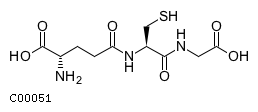

In [46]:
# Cargando el modulo Image de la biblioteca IPython.display, para desplegar imágenes
from IPython.display import Image

# Consultando la estructura molecular del compuesto cpd:C00051
result = REST.kegg_get("cpd:C00051","image").read()
Image(result)



Otro ejemplo, es **obtener** solo la **secuencia de aminoácidos** del gen **"dme:Dmel_CG13865"**, utilizando la opción "aaseq"

In [47]:
# Consultando la secuencia de aminoácidos del gen Dmel_CG13865
result = REST.kegg_get("dme:Dmel_CG13865","aaseq").read()
print(result)


>dme:Dmel_CG13865 K18180 cytochrome c oxidase assembly factor 7 | (RefSeq) Coa7; cytochrome c oxidase assembly factor 7, isoform A (A)
MAYDLKKESDVKEYVEKLGVEYRFGCYSEKKPEACHLLGDYLEGIKKDFEKASKVYKSTC
DDYGYAKSCYKYGNYSFLGKGKSGSKGNPQVAYEYYEKGCNLNDSDACLHSGLLLVSKSM
PREIDWNVPKGLEFLTKSCDLNNATACFYLSGMHISGVQKKADQSAVTASSGSGTSSPPA
GQPPLKDSDYIVLKDMKKAFQFAHKACELRNMYACANLSQMYARGDGIEKNEKEAEKYKK
LALEMQDEVKKQHDTLGFQQGVGMPN



### 6.2 Recuperando imágenes de rutas metabólicas en KEGG

`KEGG` es ampliamente reconocido por sus diagramas de rutas metabólicas (*pathways*), los cuales representan de forma visual las interacciones y procesos biológicos.

Podemos **obtener estas imágenes directamente desde Python** utilizando la función `kegg_get()` con la opción `"image"`. Esta opción permite descargar la representación gráfica de una ruta metabólica específica.  

Para especificar un mapa de una ruta en particular, se combina el prefijo `map` con el número de la ruta metabólica que se desea consultar. Por ejemplo, el mapa correspondiente a **fatty-acid biosynthesis** sería `map00061`, el cual se puede solicitar como imagen, como se muestra a continuación:


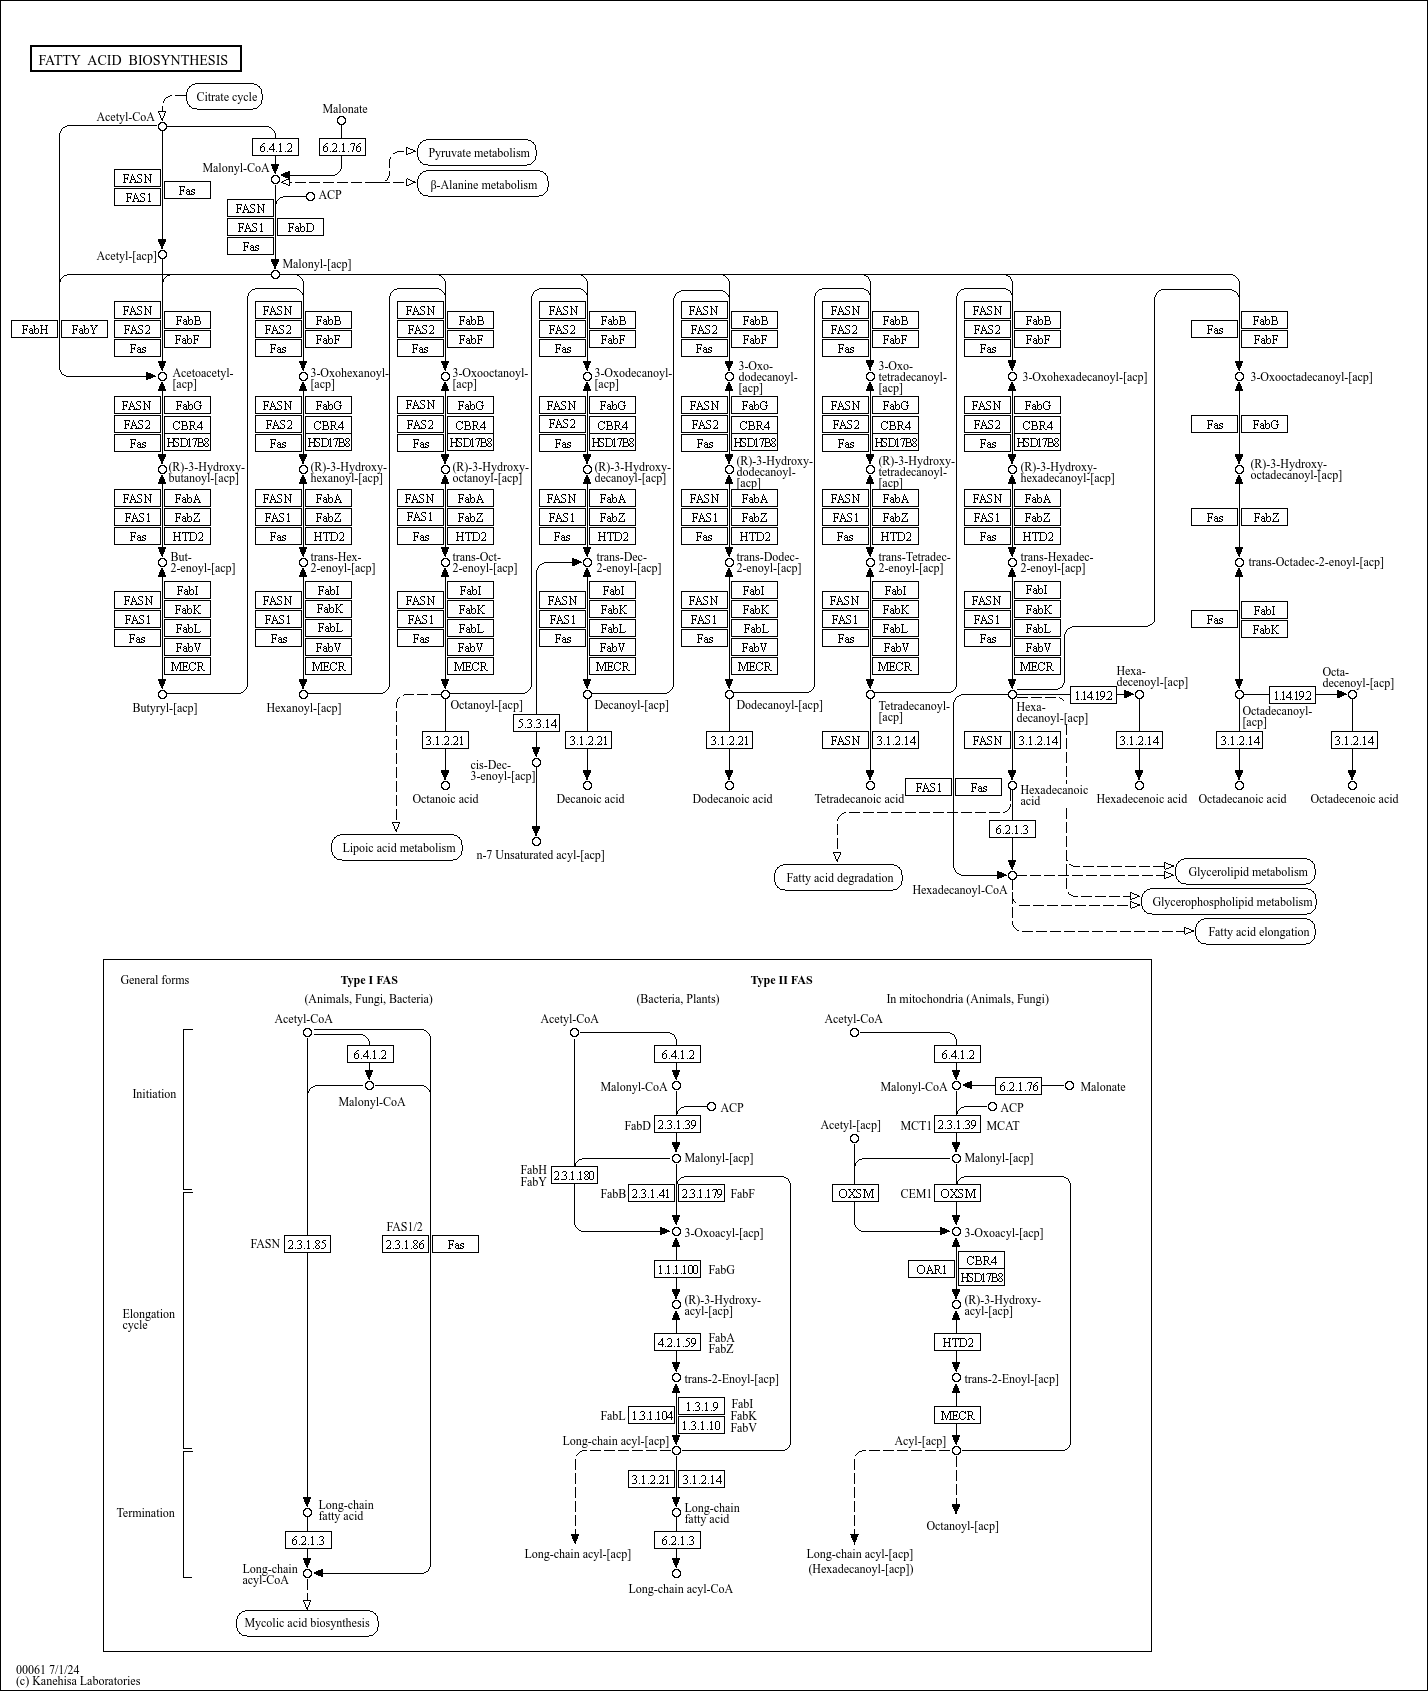

In [48]:
# Consultando el mapa correspondiente a la ruta fatty-acid biosynthesis map00061
result = REST.kegg_get("map00061","image").read()
Image(result)



# Otro ejemplo es el mapa del metabolismo central "map01100"

Si queremos recuperar el mapa de una ruta metabólica **correspondiente a un organismo en particular**, podemos reemplazar el prefijo `map` por el **código de tres letras** asignado a ese organismo.  

Por ejemplo, en el caso de *Drosophila melanogaster*, el prefijo `map` se reemplaza por `dme`, como se muestra en los siguientes ejemplos:

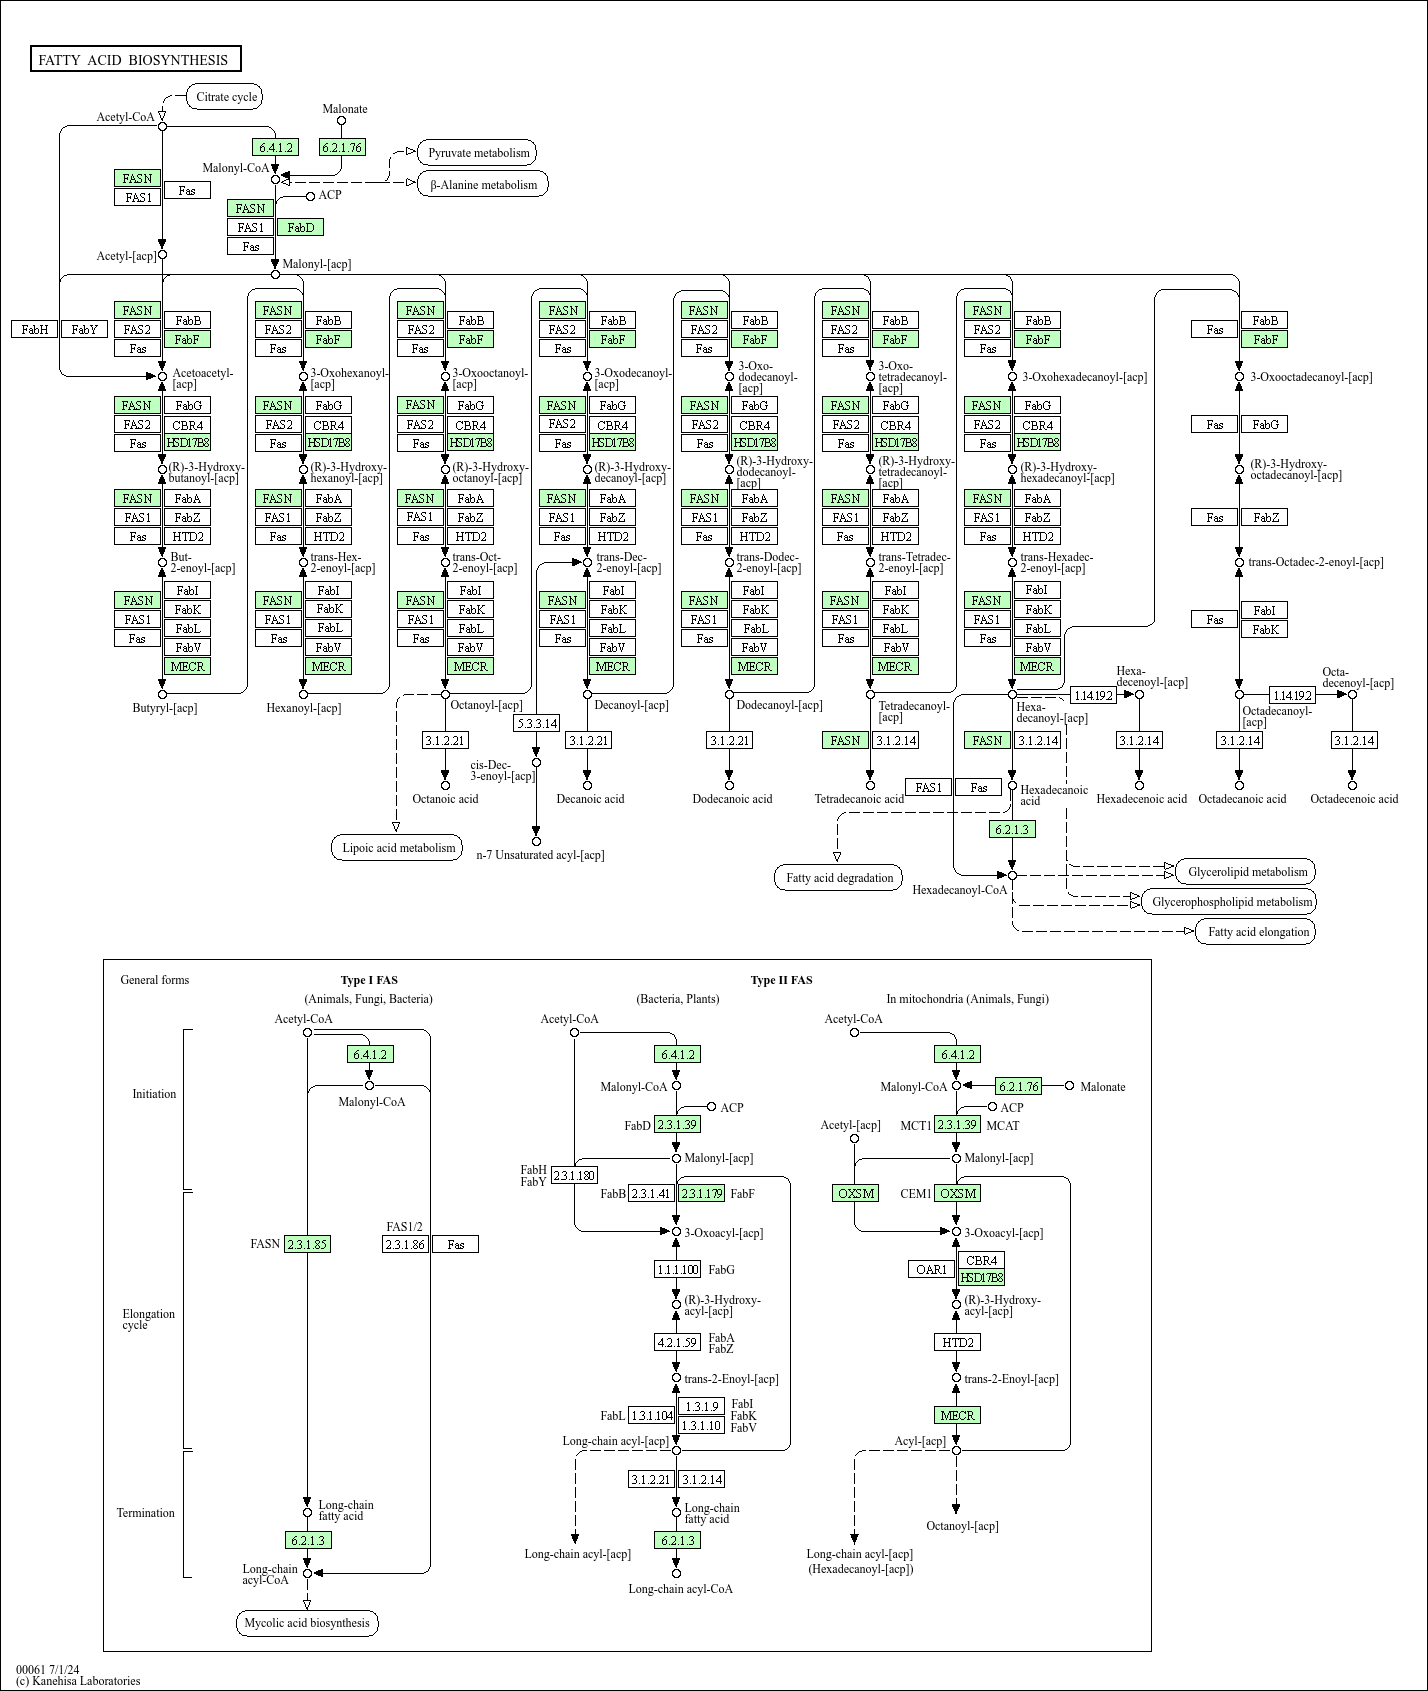

In [50]:
# Consultando el mapa correspondiente a la ruta fatty-acid biosynthesis map00061 del organismo dme(Drosophila)
result = REST.kegg_get("dme00061", "image").read()
Image(result)


## 7. `kegg_link`

La función `kegg_link` se utiliza para **encontrar relaciones o enlases entre diferentes bases de datos de Kegg**. Solicitaremos la ayuda de esta función para conocer la **descripción, parámetros y sintaxis** de la función, antes de revisar algunos ejemplos prácticos

In [51]:
# Solicitando la ayuda de kegg_link
help(REST.kegg_link)

Help on function kegg_link in module Bio.KEGG.REST:

kegg_link(target_db, source_db, option=None)
    KEGG link - find related entries by using database cross-references.
    
    target_db - Target database
    source_db_or_dbentries - source database
    option - Can be "turtle" or "n-triple" (string).



Podemos **relacionar la información de las rutas metabólicas y los genes de un organismo**, con el propósito de identificar en qué rutas participa cada gen. Por ejempo, consultemos la relación entre los genes de *Drosophila melanogaster* y las rutas metabólicas(*pathway*).

In [53]:
# Consultando la relación de Drosophila con las rutas metabólicas
result = REST.kegg_link("pathway", "dme").read()


# Transformando los resultados a un dataframe
df = pd.read_table(io.StringIO(result), header=None)
display(df)

,0,1
0,dme:Dmel_CG10160,path:dme00010
1,dme:Dmel_CG10202,path:dme00010
2,dme:Dmel_CG10467,path:dme00010
3,dme:Dmel_CG10924,path:dme00010
4,dme:Dmel_CG10996,path:dme00010
...,...,...
8078,dme:Dmel_CG8978,path:dme05100
8079,dme:Dmel_CG9012,path:dme05100
8080,dme:Dmel_CG9366,path:dme05100
8081,dme:Dmel_CG9881,path:dme05100


## 8. Puntos clave

En esta clase aprendimos a **consultar información en la base de datos de KEGG** utilizando **Biopython**, en particular el módulo `Bio.KEGG.REST`.  

Las funciones que utilizamos:

- **`kegg_list`** → Muestra los elementos disponibles en una base de datos de KEGG, como organismos, compuestos o rutas metabólicas.  
- **`kegg_info`** → Proporciona información general o estadística sobre una base de datos o sobre KEGG en general.  
- **`kegg_conv`** → Convierte identificadores entre KEGG y otras bases de datos (por ejemplo, UniProt o NCBI).  
- **`kegg_find`** → Permite buscar términos o palabras clave dentro de una base de datos.  
- **`kegg_get`** → Recupera la información completa asociada a un identificador (como un gen, compuesto o ruta).  
- **`kegg_link`** → Muestra las relaciones entre diferentes bases de datos (por ejemplo, entre genes y rutas metabólicas).

En resumen, aprendimos a **explorar y relacionar la información biológica en KEGG** desde Python, entendiendo cómo están organizadas las bases de datos y cómo acceder a la información que necesitamos de manera práctica.


## 9. Ejercicios propuestos

1. **Crear una función para parsear los resultados de `kegg_get`.**  
   Desarrollar una función que permita *parsear* los resultados obtenidos con `kegg_get`, extrayendo todos los campos clave de la consulta (`ENTRY`, `NAME`, entre otros) y la información asociada a cada uno de ellos, **independientemente del tipo de identificador** consultado (gen, compuesto, ruta metabólica, etc.).

2. **Recuperar información específica de un campo clave.**  
   Implementar una función que permita recuperar la información de un campo clave en particular (por ejemplo, `BRITE`).  
   Considere que algunos campos pueden obtenerse directamente agregando un parámetro opcional a la función `kegg_get` —como `"aaseq"`, `"ntseq"`, `"mol"`, `"kcf"`, `"image"` o `"kgml"`.  
   Sin embargo, para los campos que **no** se encuentren entre estos parámetros opcionales, deberá utilizar la función del **Ejercicio 1** para parsear el resultado y obtener la información deseada.
